### Análisis de componentes
### Introducción a Python
### GitHub repository: https://github.com/jorgemauricio/analisis_componentes
### Instructor: Jorge Mauricio

In [3]:
# librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# librerías
from sklearn.ensemble import RandomForestRegressor

# The error metric, In this cas, we will use c-stat (aka ROC/AUC)
from sklearn.metrics import roc_auc_score

# an efficient data structure
import pandas as pd

%matplotlib inline

In [4]:
# leer csv
df = pd.read_csv("data/PAPAYA_BROMATOLOGICOS.csv")

In [5]:
# estructura del csv
df.head()

,MUESTRA,HUMEDAD,AZUCARES,ETEREO,FIBRA,PROTEINA,CENIZA
0,PaSAC50,8.171828,10.844601,1.875403,22.001089,16.030,6.879787
1,PaSAC50,8.047318,12.782585,1.872500,21.374351,16.156,7.010996
2,PaSAC50,7.983207,13.015447,1.877934,22.001089,16.056,6.940326
3,PaSAC50,8.071828,11.947515,1.876403,21.743508,16.030,6.979787
4,PaSAC50,8.097318,11.933919,1.873500,21.901089,16.086,7.000996


In [6]:
df.MUESTRA.unique()

array(['PaSAC50', 'PaSAC80', 'PaLIO50', 'PaLIO80'], dtype=object)

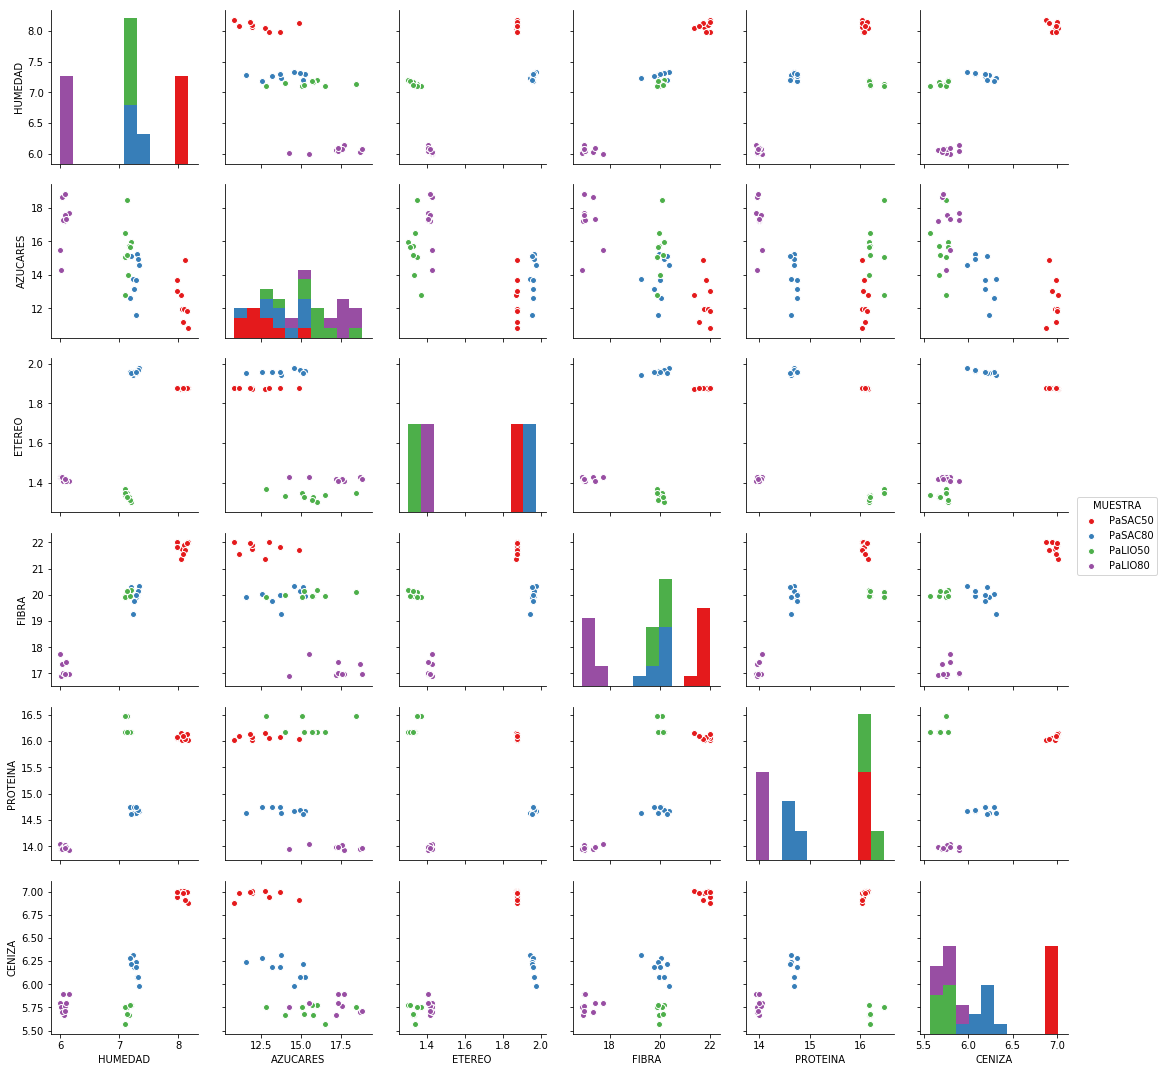

In [7]:
# EDA (Exploratory Data Analysis) correlación entre variables
sns.pairplot(df,hue='MUESTRA',palette='Set1')

In [12]:
# dividir los datos en entrenamiento y prueba para evitar que el modelo se sobrealimente
# Train Test Split
from sklearn.model_selection import train_test_split
X = df.drop('MUESTRA',axis=1)
y = df['MUESTRA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [13]:
# UTILIZAMOS UN ARBOL DE DECISIONES PARA DETERMINAR COMO ES QUE SE CLASIFICAN LOS COMPUESTOS DE ACUERDO
# A SUS CUALIDADES
#Decision Trees
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
# prediction and evaluation
predictions = dtree.predict(X_test)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

    PaLIO50       1.00      1.00      1.00         2
    PaLIO80       1.00      1.00      1.00         4
    PaSAC50       1.00      1.00      1.00         4
    PaSAC80       1.00      1.00      1.00         1

avg / total       1.00      1.00      1.00        11



In [16]:
print(confusion_matrix(y_test,predictions))

[[2 0 0 0]
 [0 4 0 0]
 [0 0 4 0]
 [0 0 0 1]]


In [17]:
# Tree Visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['HUMEDAD', 'AZUCARES', 'ETEREO', 'FIBRA', 'PROTEINA', 'CENIZA']

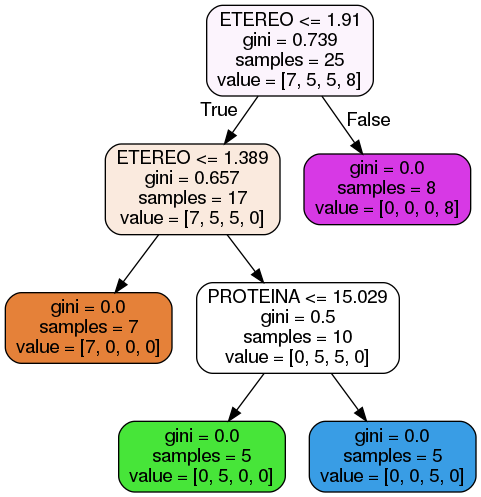

In [18]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

In [19]:
# random forests
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))

[[2 0 0 0]
 [0 4 0 0]
 [0 0 4 0]
 [0 0 0 1]]


In [21]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

    PaLIO50       1.00      1.00      1.00         2
    PaLIO80       1.00      1.00      1.00         4
    PaSAC50       1.00      1.00      1.00         4
    PaSAC80       1.00      1.00      1.00         1

avg / total       1.00      1.00      1.00        11



In [22]:
# PCA
from sklearn.preprocessing import StandardScaler

In [23]:
X = df.drop("MUESTRA", axis=1)

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [26]:
scaled_data = scaler.transform(X)

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [28]:
x_pca = pca.transform(scaled_data)

In [29]:
scaled_data.shape

(36, 6)

In [30]:
x_pca.shape

(36, 2)

In [31]:
X.head()

,HUMEDAD,AZUCARES,ETEREO,FIBRA,PROTEINA,CENIZA
0,8.171828,10.844601,1.875403,22.001089,16.030,6.879787
1,8.047318,12.782585,1.872500,21.374351,16.156,7.010996
2,7.983207,13.015447,1.877934,22.001089,16.056,6.940326
3,8.071828,11.947515,1.876403,21.743508,16.030,6.979787
4,8.097318,11.933919,1.873500,21.901089,16.086,7.000996


In [32]:
def generar_indice(elemento):
    if elemento == "PaSAC50":
        return 1
    if elemento == "PaSAC80":
        return 2
    if elemento == "PaLIO50":
        return 3
    if elemento == "PaLIO80":
        return 4

In [33]:
y_dummies = list(map(generar_indice,y))

Text(0,0.5,'Second Principal Component')

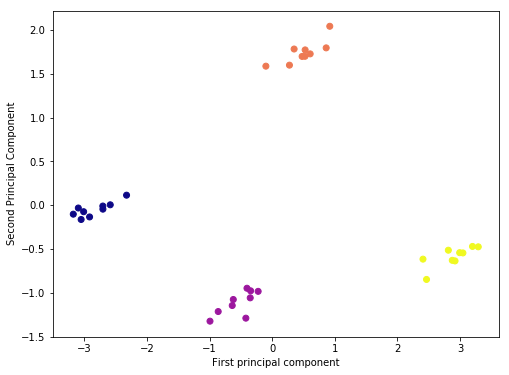

In [34]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_dummies,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [35]:
# interpreting the components
pca.components_

array([[-0.47127516,  0.413324  , -0.34569398, -0.46058078, -0.31511255,
        -0.41967616],
       [ 0.13324879,  0.14738688, -0.60036773,  0.21187538,  0.69628881,
        -0.26527565]])

In [36]:
df_comp = pd.DataFrame(pca.components_,columns=X.columns)

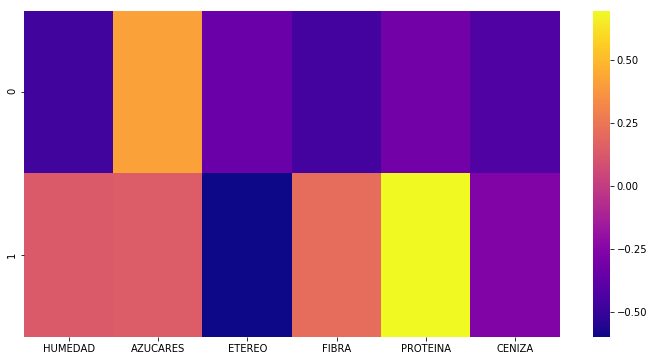

In [37]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [38]:
# K Nearest Neighbors
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_data,y_dummies,
                                                    test_size=0.30)

In [39]:
# using KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [41]:
pred = knn.predict(X_test)

In [42]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
print(confusion_matrix(y_test,pred))

[[1 0 0 0]
 [0 4 0 0]
 [0 0 4 0]
 [0 0 0 2]]


In [44]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00         1
          2       1.00      1.00      1.00         4
          3       1.00      1.00      1.00         4
          4       1.00      1.00      1.00         2

avg / total       1.00      1.00      1.00        11



In [45]:
# choosing a K Value
error_rate = []

# Will take some time
for i in range(1,25):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

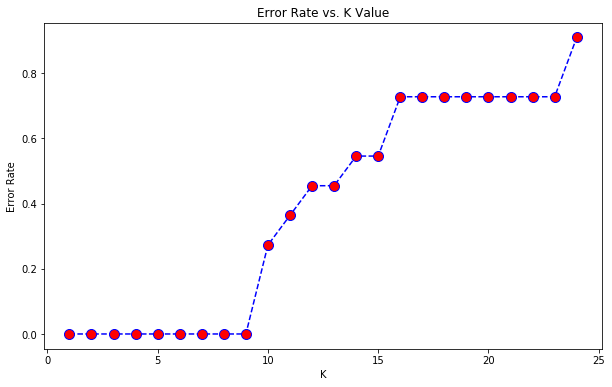

In [46]:
plt.figure(figsize=(10,6))
plt.plot(range(1,25),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [47]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[1 0 0 0]
 [0 4 0 0]
 [0 0 4 0]
 [0 0 0 2]]


             precision    recall  f1-score   support

          1       1.00      1.00      1.00         1
          2       1.00      1.00      1.00         4
          3       1.00      1.00      1.00         4
          4       1.00      1.00      1.00         2

avg / total       1.00      1.00      1.00        11



In [48]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[1 0 0 0]
 [4 0 0 0]
 [1 0 0 3]
 [0 0 0 2]]


             precision    recall  f1-score   support

          1       0.17      1.00      0.29         1
          2       0.00      0.00      0.00         4
          3       0.00      0.00      0.00         4
          4       0.40      1.00      0.57         2

avg / total       0.09      0.27      0.13        11



/home/jorge/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# EDA

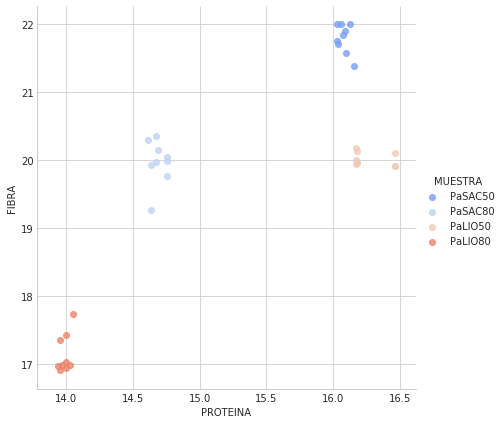

In [50]:
sns.set_style('whitegrid')
sns.lmplot('PROTEINA','FIBRA',data=df, hue='MUESTRA',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

In [51]:
from sklearn.cluster import KMeans

In [52]:
kmeans = KMeans(n_clusters=6)

In [53]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [54]:
kmeans.cluster_centers_

array([[ 7.14562729, 16.07458751,  1.32993584, 20.02666731, 16.26121429,
         5.71186773],
       [ 8.07315386, 12.15056174,  1.87576354, 21.80375922, 16.082     ,
         6.97272641],
       [ 6.01063085, 14.87663649,  1.42753047, 17.32404014, 14.004     ,
         5.77422935],
       [ 7.21768532, 13.08228626,  1.78203914, 19.8458573 , 15.16721429,
         6.0917681 ],
       [ 7.45651666, 14.94913392,  1.94696512, 20.49494232, 14.9378    ,
         6.25374435],
       [ 6.07856045, 17.77633594,  1.4164202 , 17.10375514, 13.98142857,
         5.77634162]])

In [55]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 4, 1, 1, 4, 3, 3, 4, 3, 3, 4, 4, 3, 3, 0, 0, 0,
       3, 0, 0, 0, 0, 2, 5, 5, 2, 5, 5, 5, 5, 5], dtype=int32)

In [56]:
df.head()

,MUESTRA,HUMEDAD,AZUCARES,ETEREO,FIBRA,PROTEINA,CENIZA
0,PaSAC50,8.171828,10.844601,1.875403,22.001089,16.030,6.879787
1,PaSAC50,8.047318,12.782585,1.872500,21.374351,16.156,7.010996
2,PaSAC50,7.983207,13.015447,1.877934,22.001089,16.056,6.940326
3,PaSAC50,8.071828,11.947515,1.876403,21.743508,16.030,6.979787
4,PaSAC50,8.097318,11.933919,1.873500,21.901089,16.086,7.000996


In [53]:
def generar_indice(elemento):
    if elemento == "PiLIO50":
        return 1
    if elemento == "PiLIO60":
        return 2
    if elemento == "PiLIO80":
        return 3
    if elemento == "PiSAC50":
        return 4
    if elemento == "PiSAC60":
        return 5
    if elemento == "PiSAC80":
        return 6

In [57]:
df['Cluster'] = df['MUESTRA'].apply(generar_indice)
df.head(10)

,MUESTRA,HUMEDAD,AZUCARES,ETEREO,FIBRA,PROTEINA,CENIZA,Cluster
0,PaSAC50,8.171828,10.844601,1.875403,22.001089,16.030,6.879787,1
1,PaSAC50,8.047318,12.782585,1.872500,21.374351,16.156,7.010996,1
2,PaSAC50,7.983207,13.015447,1.877934,22.001089,16.056,6.940326,1
3,PaSAC50,8.071828,11.947515,1.876403,21.743508,16.030,6.979787,1
4,PaSAC50,8.097318,11.933919,1.873500,21.901089,16.086,7.000996,1
5,PaSAC50,7.983207,13.662424,1.876934,21.843508,16.076,6.990326,1
6,PaSAC50,8.121828,14.887668,1.875403,21.701089,16.040,6.909787,1
7,PaSAC50,8.147318,11.850996,1.875500,21.991089,16.126,6.996335,1
8,PaSAC50,8.083207,11.167006,1.877934,21.574351,16.096,6.983259,1
9,PaSAC80,7.334711,14.590271,1.976403,20.350833,14.675,5.981738,2


In [58]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['Cluster'],kmeans.labels_))
print(classification_report(df['Cluster'],kmeans.labels_))

[[0 0 0 0 0 0]
 [0 8 0 0 1 0]
 [0 0 0 5 4 0]
 [7 0 0 2 0 0]
 [0 0 2 0 0 7]
 [0 0 0 0 0 0]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       1.00      0.89      0.94         9
          2       0.00      0.00      0.00         9
          3       0.29      0.22      0.25         9
          4       0.00      0.00      0.00         9
          5       0.00      0.00      0.00         0

avg / total       0.32      0.28      0.30        36



/home/jorge/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
